In [9]:
import pandas as pd
import numpy as np
import torch
import torchvision
from PIL import Image
from torchvision import transforms
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as img

In [3]:
df = pd.read_csv('label.csv')

In [4]:
df

Unnamed: 0               fname                    path  age  gender  \
0               0  incorrect_mask.jpg  000001_female_Asian_45   45  female   
1               1           mask1.jpg  000001_female_Asian_45   45  female   
2               2           mask2.jpg  000001_female_Asian_45   45  female   
3               3           mask3.jpg  000001_female_Asian_45   45  female   
4               4           mask4.jpg  000001_female_Asian_45   45  female   
...           ...                 ...                     ...  ...     ...   
18895       18895           mask2.jpg    006959_male_Asian_19   19    male   
18896       18896           mask3.jpg    006959_male_Asian_19   19    male   
18897       18897           mask4.jpg    006959_male_Asian_19   19    male   
18898       18898           mask5.jpg    006959_male_Asian_19   19    male   
18899       18899          normal.jpg    006959_male_Asian_19   19    male   

       label  
0         10  
1          4  
2          4  
3          4  
4          4  
...      ...  
18895      0  
18896      0  
18897      0  
18898      0  
18899     12  

[18900 rows x 6 columns]

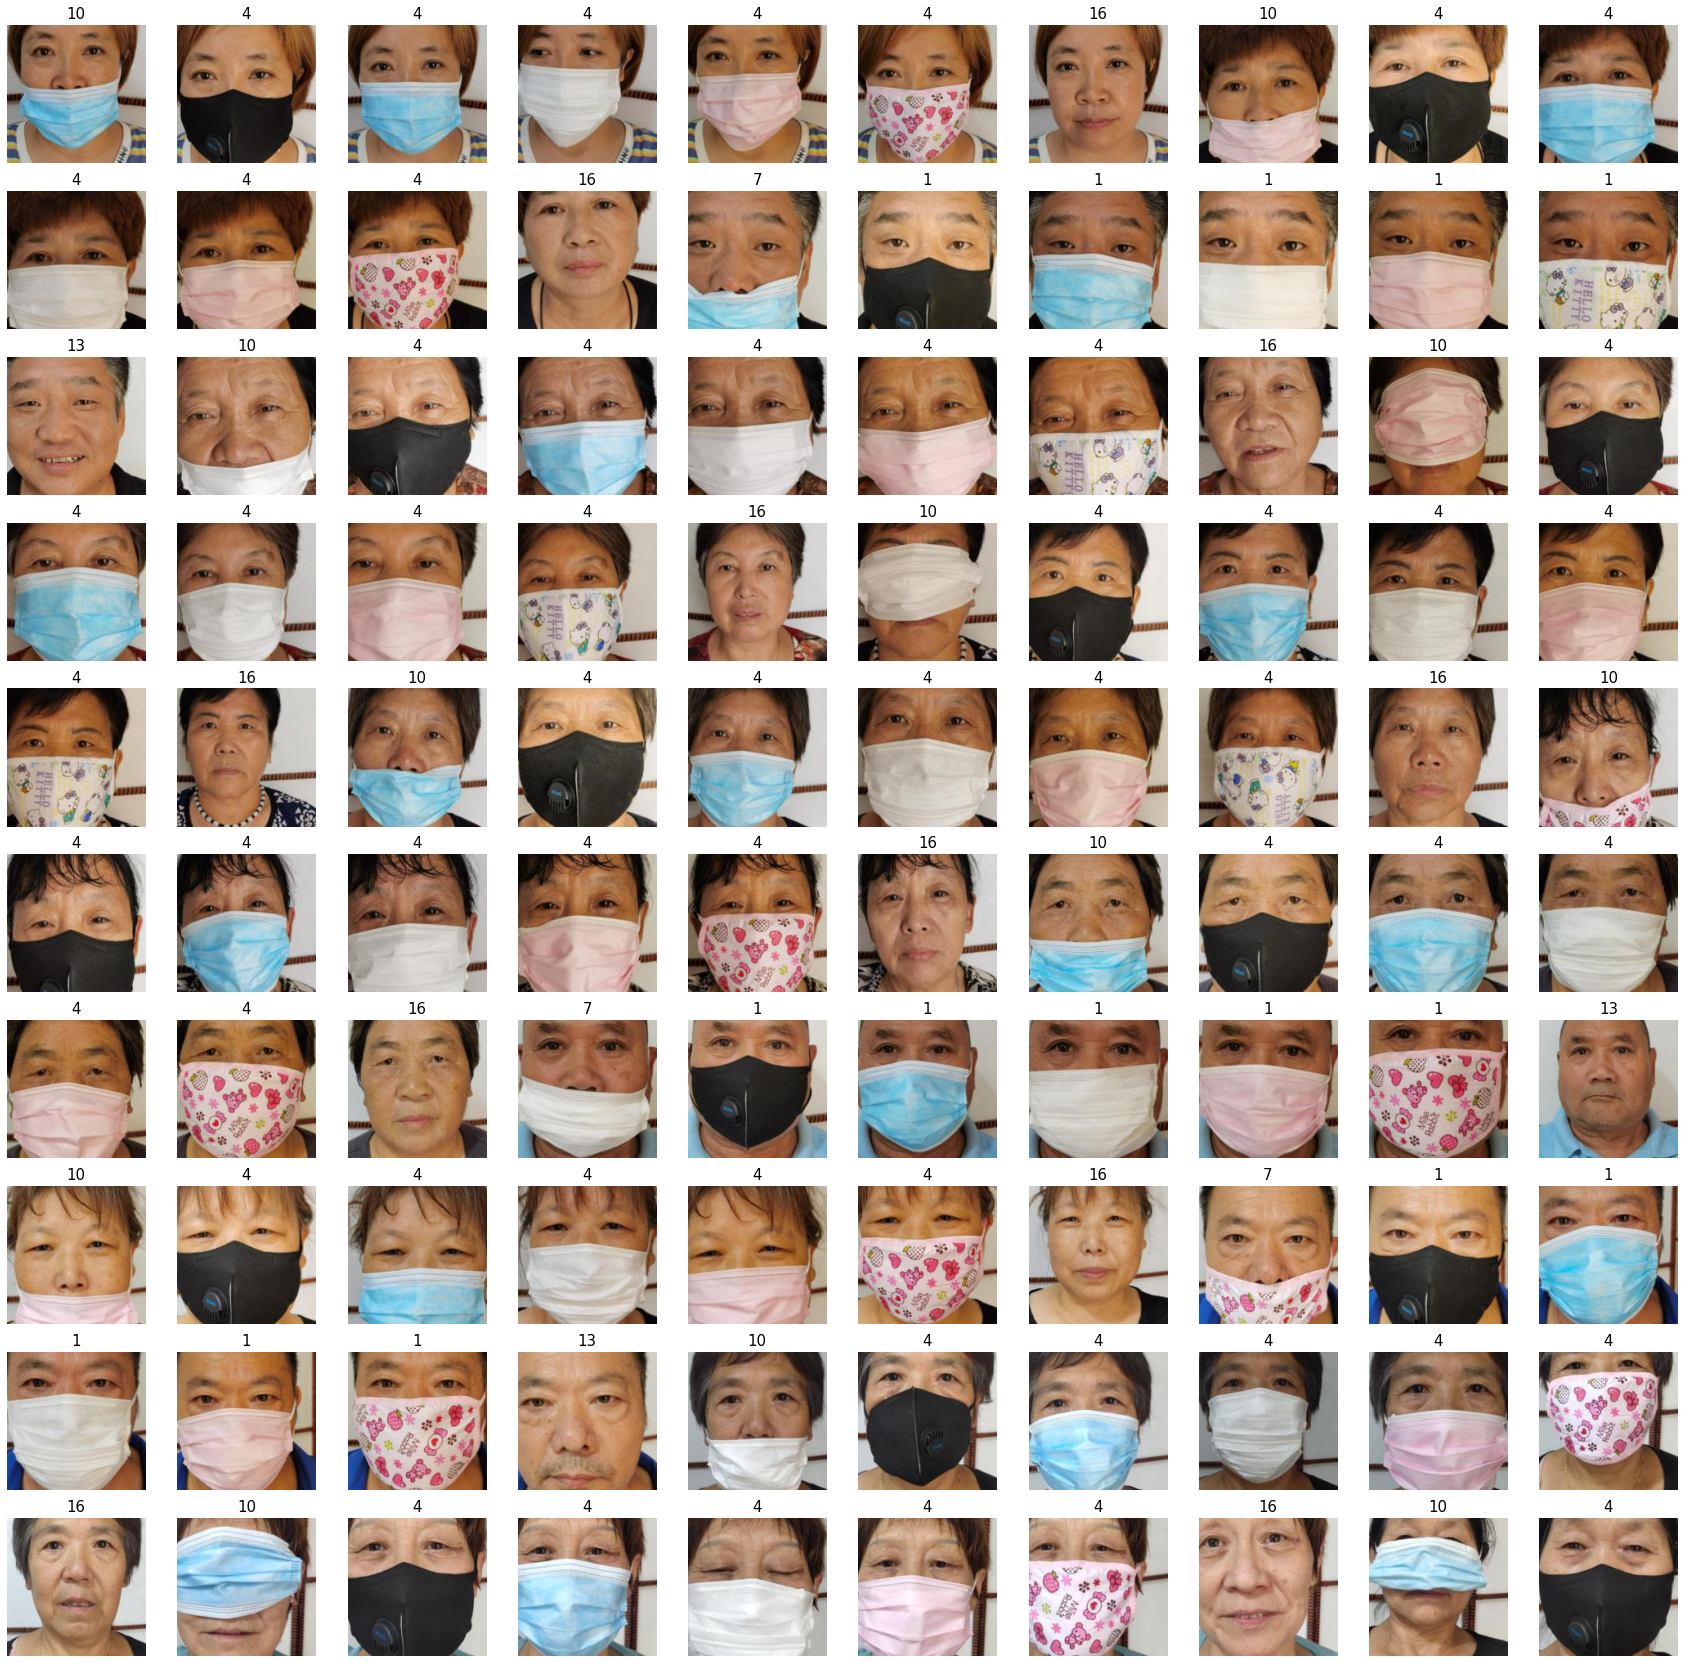

In [22]:
fig, axs = plt.subplots(10,10,figsize=(30,30))
img_list = []
label_list = []
for i in range(100):
    fname_ = df.loc[i]['fname']
    path_ = df.loc[i]['path']
    img_list.append(path_ + '/' + fname_)
    label_list.append(df.loc[i]['label'])
    
for i,img_ in enumerate(img_list):
    im = Image.open('./images/' + img_)
    im = transforms.CenterCrop(170)(im)
    axs[i//10,i%10].imshow(im)
    axs[i//10,i%10].set_title(label_list[i],fontsize=15)
    axs[i//10,i%10].axis('off')
plt.show()

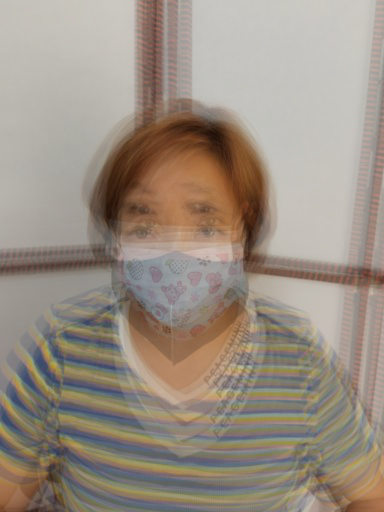

In [68]:
im1 = Image.open('./images/' + df.loc[1]['path'] + '/' + df.loc[1]['fname'])
im1tensor = transforms.ToTensor()(im1)
im2 = Image.open('./images/' + df.loc[2]['path'] + '/' + df.loc[2]['fname'])
im2tensor = transforms.ToTensor()(im2)
im3 = Image.open('./images/' + df.loc[3]['path'] + '/' + df.loc[3]['fname'])
im3tensor = transforms.ToTensor()(im3)
im4 = Image.open('./images/' + df.loc[4]['path'] + '/' + df.loc[4]['fname'])
im4tensor = transforms.ToTensor()(im4)
im5 = Image.open('./images/' + df.loc[5]['path'] + '/' + df.loc[5]['fname'])
im5tensor = transforms.ToTensor()(im5)
avg_tensor = (im1tensor + im2tensor + im3tensor + im4tensor + im5tensor)/5
avg_img = transforms.ToPILImage()(avg_tensor)
avg_img
#avg_tensor

In [65]:
print(transforms.ToTensor()(im1))
print(transforms.ToTensor()(im2))
print(transforms.ToTensor()(im3))
print(transforms.ToTensor()(im4))
print(transforms.ToTensor()(im5))


tensor([[[0.8431, 0.8431, 0.8431,  ..., 0.8000, 0.7765, 0.7569],
         [0.8431, 0.8431, 0.8431,  ..., 0.8000, 0.7765, 0.7569],
         [0.8431, 0.8431, 0.8431,  ..., 0.7961, 0.7725, 0.7529],
         ...,
         [0.6824, 0.6784, 0.6745,  ..., 0.7333, 0.7255, 0.7216],
         [0.6784, 0.6784, 0.6745,  ..., 0.6745, 0.6627, 0.6588],
         [0.6784, 0.6784, 0.6745,  ..., 0.5882, 0.5725, 0.5647]],

        [[0.8392, 0.8392, 0.8392,  ..., 0.8039, 0.7804, 0.7608],
         [0.8392, 0.8392, 0.8392,  ..., 0.8039, 0.7804, 0.7608],
         [0.8392, 0.8392, 0.8392,  ..., 0.8000, 0.7765, 0.7569],
         ...,
         [0.4980, 0.4941, 0.4863,  ..., 0.5255, 0.5176, 0.5137],
         [0.4941, 0.4941, 0.4863,  ..., 0.4667, 0.4549, 0.4510],
         [0.4941, 0.4941, 0.4863,  ..., 0.3804, 0.3647, 0.3569]],

        [[0.8235, 0.8235, 0.8235,  ..., 0.7843, 0.7608, 0.7412],
         [0.8235, 0.8235, 0.8235,  ..., 0.7843, 0.7608, 0.7412],
         [0.8235, 0.8235, 0.8235,  ..., 0.7804, 0.7569, 0.

In [69]:
df

Unnamed: 0               fname                    path  age  gender  \
0               0  incorrect_mask.jpg  000001_female_Asian_45   45  female   
1               1           mask1.jpg  000001_female_Asian_45   45  female   
2               2           mask2.jpg  000001_female_Asian_45   45  female   
3               3           mask3.jpg  000001_female_Asian_45   45  female   
4               4           mask4.jpg  000001_female_Asian_45   45  female   
...           ...                 ...                     ...  ...     ...   
18895       18895           mask2.jpg    006959_male_Asian_19   19    male   
18896       18896           mask3.jpg    006959_male_Asian_19   19    male   
18897       18897           mask4.jpg    006959_male_Asian_19   19    male   
18898       18898           mask5.jpg    006959_male_Asian_19   19    male   
18899       18899          normal.jpg    006959_male_Asian_19   19    male   

       label  
0         10  
1          4  
2          4  
3          4  
4          4  
...      ...  
18895      0  
18896      0  
18897      0  
18898      0  
18899     12  

[18900 rows x 6 columns]

In [76]:
def plot_imgs(idx):
    path_ = df.loc[idx]['path']
    fname_ = df.loc[idx]['fname']
    img_ = './images/' + path_ +'/' + fname_
    imgs = [np.array(Image.open(img_))]
    
    n_rows, n_cols = 2,3
    fig,axes = plt.subplots(n_rows,n_cols,sharex=True,sharey=True,figsize=(15,12))
    for i in range(n_rows*n_cols):
        axes[i//(n_rows+1)][i%n_cols].imshow(imgs[i])
        axes[i//(n_rows+1)][i%n_cols].set_title(f'{fname_}',color='r')
    plt.tight_layout()
    plt.show()
    #print(imgs)

IndexError: list index out of range

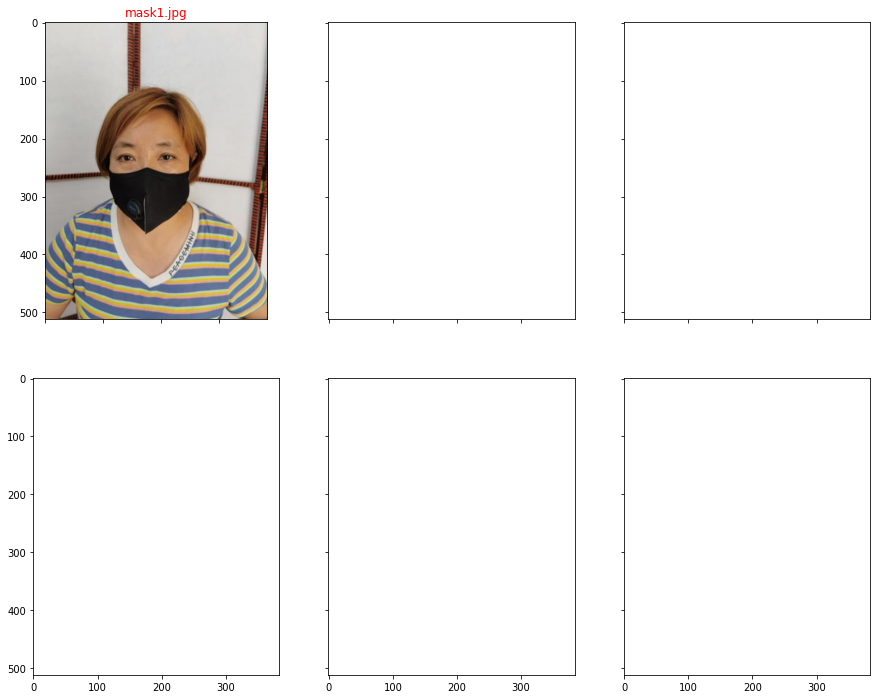

In [77]:
plot_imgs(1)

In [132]:
from torch.utils.data import Dataset, DataLoader

In [404]:
class CDataset(Dataset):
    def __init__(self,train=True):
        self.df = pd.read_csv('./label.csv')
        #self.X = Image.open('./images/' + self.df.loc[idx]['path'] + '/' + self.df.loc[idx]['fname'])
        #self.y = self.df.loc[idx]['label']
    def __len__(self):
        return len(self.df)
    def __getitem__(self,idx):
        X = Image.open('./images/' + self.df.loc[idx]['path'] + '/' + self.df.loc[idx]['fname'])
        #X = transforms.CenterCrop(270)(X)
        y = self.df.loc[idx]['label'] 
        #print(y)
        X = transforms.ToTensor()(X)
        y = torch.tensor(y)
        return X,y

In [405]:
df.loc[0]['label']

10

In [406]:
CDataset_test = CDataset(train=True)

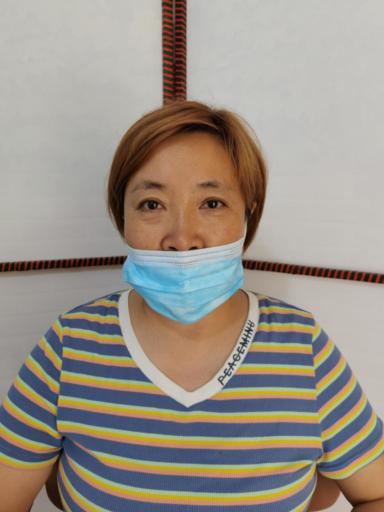

In [407]:
transforms.ToPILImage()(CDataset_test[0][0])

In [408]:
dataloader_CDataset_test = DataLoader(CDataset_test, 
                                      batch_size=10,
                                      shuffle=True,
                                      num_workers=3)

In [464]:
dataloader_CDataset_test

AttributeError: 'DataLoader' object has no attribute 'item'

In [409]:
r_labels

tensor([10,  3,  0,  4, 10,  3,  9,  0,  0,  7])

In [410]:
def DatasetToImgs(rand_imgs, rand_labels):
    #print(len(rand_labels))
    n_rows = len(rand_labels)//2
    n_cols = 2
    fig,axes = plt.subplots(n_rows, n_cols, figsize=(30,20))
    print(rand_labels)
    
    for i in range(len(rand_labels)):
        print(f'{i}//{(n_cols)} -> {i//(n_cols)}, {i}%2 -> {i%2}')
        axes[i//(n_cols)][i%n_cols].imshow(transforms.ToPILImage()(rand_imgs[i]))
        axes[i//(n_cols)][i%n_cols].set_title(f'{rand_labels[i]}')
        #axes[i//((len(rand_labels)/2)+1)][i%2].imshow(transforms.ToPILImage()(rand_imgs[i]))
        #axes[i//((len(rand_labels)/2)+1)][i%2].set_title(f'{rand_labels}')
    plt.tight_layout()
    plt.show()
        

In [411]:
0%2

0

In [412]:
r_imgs, r_labels = next(iter(dataloader_CDataset_test))

In [413]:
r_labels[0]

tensor(4)

In [414]:
(transforms.ToPILImage()(r_imgs[0])).size

(384, 512)

tensor([ 4,  4,  0,  1,  3, 16,  4,  3,  4,  3])
0//2 -> 0, 0%2 -> 0
1//2 -> 0, 1%2 -> 1
2//2 -> 1, 2%2 -> 0
3//2 -> 1, 3%2 -> 1
4//2 -> 2, 4%2 -> 0
5//2 -> 2, 5%2 -> 1
6//2 -> 3, 6%2 -> 0
7//2 -> 3, 7%2 -> 1
8//2 -> 4, 8%2 -> 0
9//2 -> 4, 9%2 -> 1


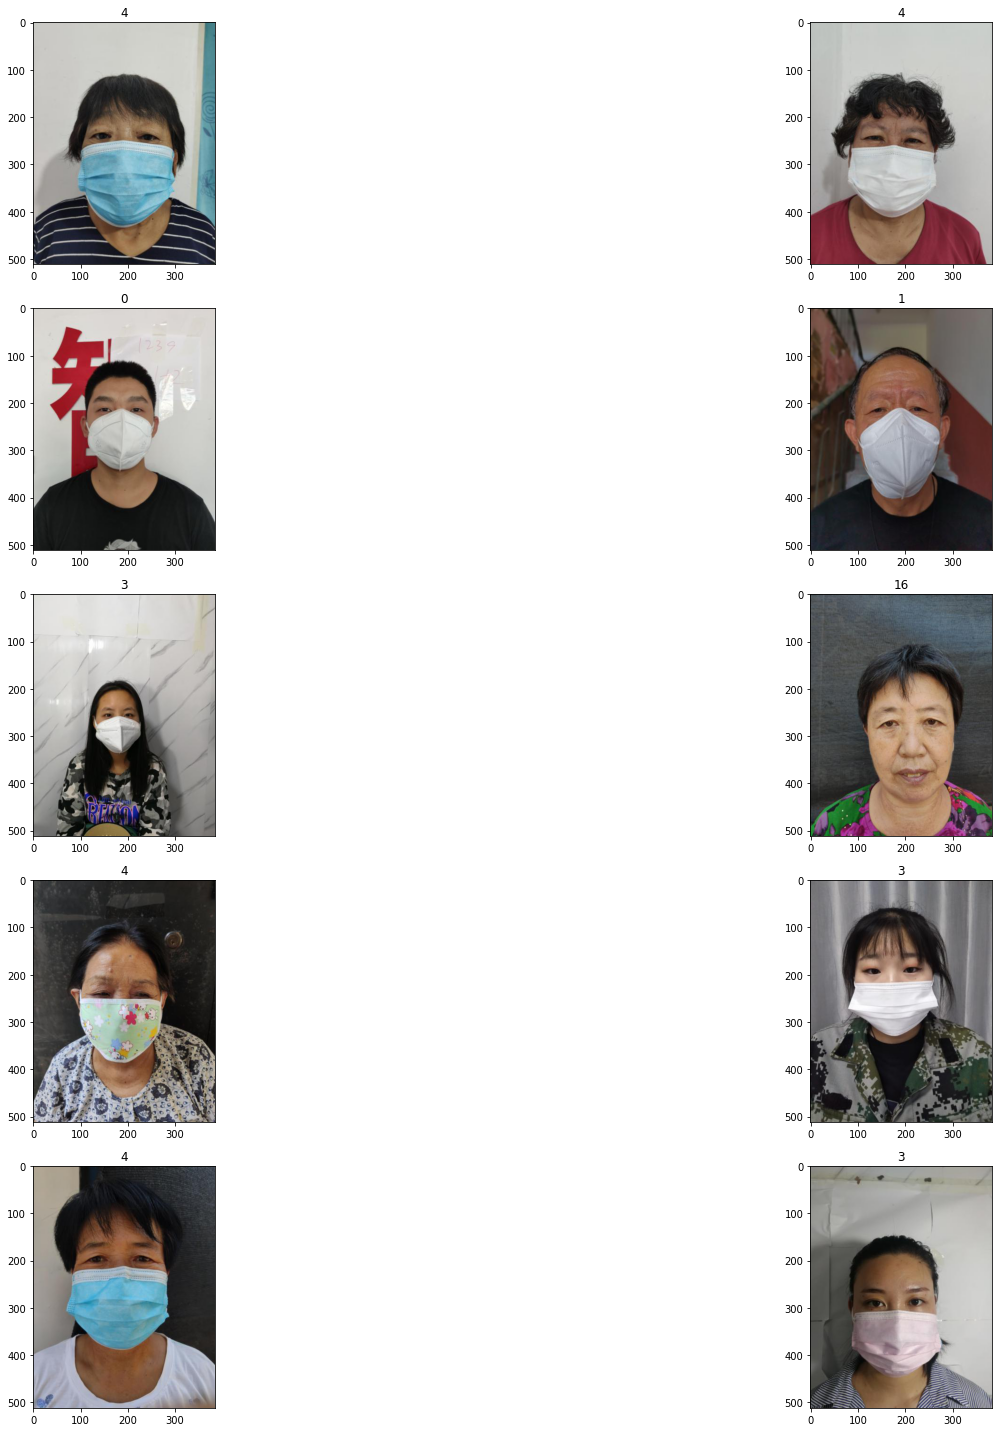

In [415]:
DatasetToImgs(r_imgs,r_labels)

In [424]:
r_imgs, r_labels = next(iter(dataloader_CDataset_test))

In [425]:
for (X_,Y_) in dataloader_CDataset_test:
    print('X_:', X_.size(), 'type:', X_.type()) 
    print('Y_:', Y_.size(), 'type:', Y_.type())
    break

X_: torch.Size([10, 3, 512, 384]) type: torch.FloatTensor
Y_: torch.Size([10]) type: torch.LongTensor


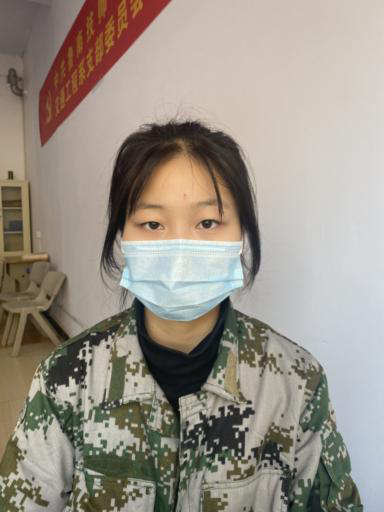

In [470]:
transforms.Compose([transforms.ToPILImage()])(r_imgs[0])

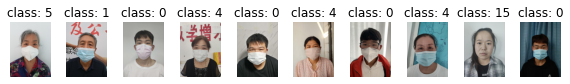

In [426]:
pltsize = 1
plt.figure(figsize=(10*pltsize,pltsize))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(np.transpose(X_[i],(1,2,0)))
    plt.title('class: ' + str(Y_[i].item()))

In [427]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [428]:
class Net_1(nn.Module):
    def __init__(self):
        super(Net_1,self).__init__()
        self.fc1 = nn.Linear(384*512*3,512) # output 노드수 512
        self.fc2 = nn.Linear(512,256) # output 노드수 256
        self.fc3 = nn.Linear(256,18)
    
    def forward(self,x):
        x = x.view(-1,384*512*3)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x,dim=1)
        return x

In [429]:
DEVICE = torch.device('cuda')

In [430]:
model_1 = Net_1().to(DEVICE)
optimizer = torch.optim.Adam(model_1.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()
print(model_1)

Net_1(
  (fc1): Linear(in_features=589824, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=18, bias=True)
)


In [453]:
def train_1(model_1, dataloader_CDataset_test, optimizer, log_interval):
    model_1.train()
    for batch_idx, (image, label) in enumerate(dataloader_CDataset_test):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model_1(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{}({:.0f}%)]\t Train Loss: {:.6f}'.format(Epoch, batch_idx * len(image),
                                                                                 len(dataloader_CDataset_test.dataset),
                                                                                 100. *batch_idx/len(dataloader_CDataset_test),
                                                                                 loss.item()))

In [456]:
def evalutation(model_1, dataloader_CDataset_test):
    model_1.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for image, label in dataloader_CDataset_test:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model_1(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1,keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    test_loss /= len(dataloader_CDataset_test.dataset)
    test_accuracy = 100. * correct / len(dataloader_CDataset_test.dataset)
    return test_loss, test_accuracy
    

In [457]:
EPOCHS = 5

In [458]:
for Epoch in range(1, EPOCHS + 1):
    train_1(model_1,dataloader_CDataset_test,optimizer,log_interval = 200)
    test_loss, test_accuracy = evalutation(model_1, dataloader_CDataset_test)
    print('\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f}%\n'.format(Epoch,test_loss,test_accuracy))

Train Epoch: 1 [0/18900(0%)]	 Train Loss: 2.725338
Train Epoch: 1 [2000/18900(11%)]	 Train Loss: 2.198232
Train Epoch: 1 [4000/18900(21%)]	 Train Loss: 2.671785
Train Epoch: 1 [6000/18900(32%)]	 Train Loss: 2.214404
Train Epoch: 1 [8000/18900(42%)]	 Train Loss: 1.711556
Train Epoch: 1 [10000/18900(53%)]	 Train Loss: 2.755486
Train Epoch: 1 [12000/18900(63%)]	 Train Loss: 2.314343
Train Epoch: 1 [14000/18900(74%)]	 Train Loss: 2.185614
Train Epoch: 1 [16000/18900(85%)]	 Train Loss: 1.874088
Train Epoch: 1 [18000/18900(95%)]	 Train Loss: 2.938310

[EPOCH: 1], 	Test Loss: 0.2361, 	Test Accuracy: 21.61%

Train Epoch: 2 [0/18900(0%)]	 Train Loss: 2.400966
Train Epoch: 2 [2000/18900(11%)]	 Train Loss: 2.446553
Train Epoch: 2 [4000/18900(21%)]	 Train Loss: 3.108445
Train Epoch: 2 [6000/18900(32%)]	 Train Loss: 2.043513
Train Epoch: 2 [8000/18900(42%)]	 Train Loss: 2.273670
Train Epoch: 2 [10000/18900(53%)]	 Train Loss: 2.002143
Train Epoch: 2 [12000/18900(63%)]	 Train Loss: 2.499887
Train Epo

KeyboardInterrupt: 

In [417]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [418]:
net = Net()

In [419]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.01,momentum=0.9)

In [36]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(img_list,0):
        print(data)
        inputs,labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i% 2000 == 1999:
            print('[%d, %5d] loss : %.3f' % (epoch + 1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Done')

ValueError: too many values to unpack (expected 2)

In [ ]:
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock,self).__init__()
        self.conv1 = nn.Conv

In [447]:
import torchvision.models as models

In [449]:
resnet_model = models.resnet34(pretrained=False)
num_ftrs = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_ftrs,10)
resnet_model = resnet_model.cuda()

for Epoch in range(1, EPOCHS + 1):
    train(resnet_model, 

In [450]:
resnet_dataloader = dataloader_CDataset_test = DataLoader(CDataset_test, 
                                      batch_size=10,
                                      shuffle=True,
                                      num_workers=3)

In [455]:
100. * 10

1000.0